In [41]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

### Homework 1

Try to do it by hands first(at least for the first term) then check with/ use wolframalpha.

Find 3-rd derivative: just type ` d^3/dx^3 tan(x)` or `d^3/dx^3 tan(x) at x =10`

If you need to taylor series, just type `taylor cos(x) at x = 0`.



1) Plot $\cos(x)$ from $-\pi$ to $\pi$ along with the Taylor approximation using (1,2,3,4) terms. I want 5 lines on the same graph.

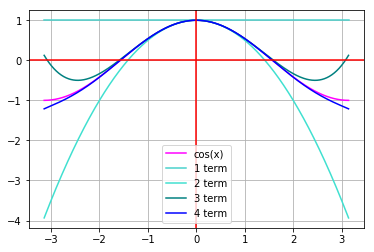

In [5]:
def g(x):
    return math.cos(x)
def g_0(x):
    return 1
def g_2(x):
    return 1 - ((x**2)/math.factorial(2))
def g_4(x):
    return 1 - ((x**2)/math.factorial(2)) + ((x**4)/math.factorial(4))
def g_6(x):
    return 1 - ((x**2)/math.factorial(2)) + ((x**4)/math.factorial(4)) - ((x**6)/math.factorial(6))
xs = np.linspace(-math.pi,math.pi,1000)
ys = [g(x) for x in xs]
cosx = plt.plot(xs, ys, color="magenta", label="cos(x)")

ys_0 = [g_0(x) for x in xs]
plt.plot(xs, ys_0, color ="mediumturquoise", label="1 term")

ys_2 = [g_2(x) for x in xs]
plt.plot(xs, ys_2, color ="turquoise", label ="2 term")

ys_4 = [g_4(x) for x in xs]
plt.plot(xs, ys_4, color ="teal", label ="3 term")

ys_6 = [g_6(x) for x in xs]
plt.plot(xs, ys_6, color="blue", label ="4 term")

plt.axvline(0, color="red")
plt.axhline(0, color="red")
plt.legend()
plt.grid()

1.1) If we estimate $\cos(0.1)$ using 4 **non-zero** terms, what is the bound on the **truncation error**.

$$
    cos(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + R_n
$$
$$
    \begin{align*}
    R_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-a)^{(n+1)}\\
    = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-a)^{(n+1)}\\
    = \frac{sin(0.1)}{(7)!}(0.1-0)^{(7)}
    \end{align*}
$$


In [7]:
err = math.sin(0.1)/math.factorial(7)*0.1**7
print("error =", err, "bound=["+str(g_6(0.1)+err)+", "+str(g_6(0.1)-err)+"]")

error = 1.980821758865639e-12 bound=[0.9950041652797587, 0.9950041652757969]


1.2) How many **non-zero** terms do we need to calculate $\cos(0.1)$ such that the bound on the **truncation error** is less than $10^{-7}$

In [37]:
def f(n):
    return math.sin(0.1)/math.factorial(n+1)*0.1**(n+1)
def errorLessThan(f):
    n=0
    err= f(n)
    while(err>=10**-7):
        n=n+2
        err=f(n)
    return n/2+1
print(errorLessThan(f))


3.0


2) Plot $\ln (1+x)$ from $-0.5$ to $0.5$ along with the Taylor approximation using (1,2,3,4) terms. I want 5 lines on the same plot.

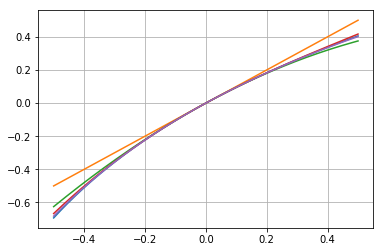

In [46]:
def ln(x):
    return math.log(x+1, math.e)
def l_1(x):
    return x
def l_2(x):
    return x-(x**2)/math.factorial(2)
def l_3(x):
    return x-((x**2)/math.factorial(2)) + (2*(x**3)/math.factorial(3))
def l_4(x):
    return x-((x**2)/math.factorial(2)) + (2*(x**3)/math.factorial(3)) - (6*(x**4)/math.factorial(4))
xs = np.linspace(-0.5,0.5,1000)
ys = [ln(x) for x in xs]
plt.plot(xs,ys)
ys1 =[l_1(x) for x in xs]
plt.plot(xs, ys1)
ys2=[l_2(x) for x in xs]
plt.plot(xs, ys2)
ys3=[l_3(x) for x in xs]
plt.plot(xs, ys3)
ys4=[l_4(x) for x in xs]
plt.plot(xs, ys4)
plt.grid()

2.1)If we calculate $\ln(1.5)$ using 3 **non-zero** terms, what is the bound on the **truncation error**.

In [49]:
print(l_4(0.5))
print(math.log(1.5,math.e))

0.4010416666666667
0.4054651081081644


2.2)How many **non-zero** terms do we need to calculate $\ln(1.5)$ such that the bound on **truncation error** is less than $10^{-7}$. Be sure to justify the maximum of $f^{(n+1)}(\xi)$ term.

In [56]:
def cal_error(x,f,e):
    c_e = f*np.abs((x**(e+1))/math.factorial(e+1))
    return c_e
e= calError(0.5,6.,3)
def cal_term(x,f,counter,limit):
    
    while(True):
        c_e = cal_error(x,math.factorial(f),counter)
#         print(counter)
        
        if (c_e <= limit):
            return counter
        counter += 1
        f+=1
        
        
cal_term(0.5,0,0,10**-7)

19

3) Notice that $\tan(1) = \pi/4$ , this means we can calculate $\pi$ by using $4 \times \arctan(1)$

So this means that if we find Taylor series expansion of $\arctan(x)$ around $x=0$, then we can calculate $\pi$ to any accuracy we want.

3.1) Find taylor expansion of $\arctan$ for 3 **non-zero** terms. If you forgot,
$$
\frac{d}{dx} \arctan(x) = \frac{1}{1+x^2}
$$

ANS:
$arctan(x) = x - \frac{2(x^3)}{3!} + \frac{24(x^5)}{5!}$

In [63]:
def aTan(x):
    return math.atan(x)

def at1(x):
    return x

def at3(x):
    return x -2*(x**3)/math.factorial(3)
def at5(x): #3 non-zero terms
    return x -2*(x**3)/math.factorial(3) +24*(x**5)/math.factorial(5)


3.2) Guess the rest of the terms

In [77]:
#2,24,720,40320
#2!,4!,5!,7!
def atNonZeroTermK(x,k):
#     if(k<=5):
#         print("K MUST BE MORE THAN 5")
#         return 0
    summ=0
    sign = 1
    neg =-1
    for i in range(k):
        j=i*2+1
        summ += sign*(math.factorial(j-1)*(x**j)/math.factorial(j))
        sign*=neg
    return summ
atNonZeroTermK(1,3)


0.8666666666666667

3.3) Calculate $\pi$ using taylor approximation for 100 **non-zero** terms. (Note I changed this to 100 terms so you must write some sort of for loop to do it).

In [82]:
atNonZeroTermK(1,100)*4


3.1315929035585537

4) The purpose of this problem is to make sure you know that the bound on $f^{(n+1)}(\xi)$ after all the cancellation is **NOT** necessarily 1 **NOR** does it have to look the same as the next term in the series.

4.1)Find the first 3 **non-zero** terms of Taylor series for
$$f(x) = \frac{1}{1-x}$$

$
    1 + x +x^2
$

4.2) If we estimate $$\frac{1}{0.8} = \frac{1}{1-0.2}$$ using the first 3 non-zero terms, what is the bound on the truncation error. Be careful about evaluating the bound for $f^{(n+1)}({\xi})$.

In [86]:
print("error: ", (6/(1-0.2)**4) * (0.2**3/ math.factorial(3)))

error:  0.01953125


5) (Optional) When Taylor series sort of doesn't work. 
$$
f(x) = \begin{cases}
e^{-1/x^2} & x \ne 0 \\
0 & x = 0
\end{cases}
$$

Find taylor series expansion of this function around $x=0$ for 5 terms. Take the limit carefully.

Did you notice something? What's happening? (Plot and Try to calculate the error term to see what is going on)